# Table of contents

0. Introduction

1. Load the dataset

2. PCA; Principal Components Analysis  
   2.1. 2차원 좌표축으로 표현하기

3. Classification  
   3.1. Logistic Regression  
   3.2. Decision Tree  
   3.3. Random Forest  
   3.4. Dense layer

# 0. Introduction

**Dataset**  
- diabetes(당뇨병) | [Download csv file](https://github.com/MyungKyuYi/AI-class/blob/main/diabetes.csv)

**Environment**
- macOS `x86`cpu

**Framework**  
- TensorFlow: Version `2.10.0`

**Dependencies**  
- Python: Version `3.9.18`
- Numpy: Version `1.26.4`
- Pandas: Version `2.2.2`
- Matplotlib: Version `3.9.2`
- scikit-learn: Version `1.5.1`

**Purpose**
- 기존의 diabetes dataset은 8개의 feature를 가지고 있다. 이를 PCA를 통해 n(<8)개의 principal components를 추출하여 학습을 진행한다.

# 1. Load the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 2. PCA; Principal Components Analysis

In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7) # 추출할 주성분 수 설정
pca.fit(X) # X에 대해서 7개의 주성분 추출

PCA(n_components=7)

In [5]:
pca.components_.shape # (추출한 주성분 수, 원본 데이터의 특성 수)

(7, 8)

In [6]:
# 현재 주성분 수(7개)가 원본 데이터의 분산을 얼마나 잘 나타내고 있는지의 비율
print(np.sum(pca.explained_variance_ratio_))

0.9999932073569858


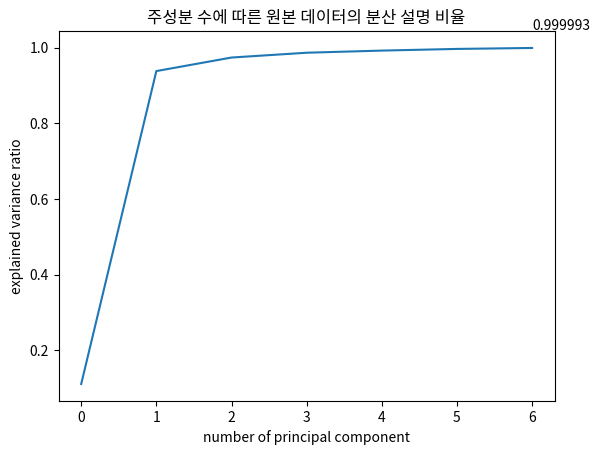

In [7]:
import matplotlib.font_manager as fm
# 한글용 폰트 설정
plt.rc('font', family='Noto Sans KR')

plt.plot(1 - pca.explained_variance_ratio_)
plt.xlabel('number of principal component')
plt.ylabel('explained variance ratio')
# plt.ylim(0.8, 1)
plt.title('주성분 수에 따른 원본 데이터의 분산 설명 비율')
# 그래프의 가장 큰 값과 그 위치
max_value = np.sum(pca.explained_variance_ratio_)
max_index = 6

# 최대값 표시
plt.text(max_index, max_value+0.04, f'{max_value:.6f}', fontsize=10, ha='left', va='bottom')
plt.show()

In [28]:
len('principal component number') # 26
len('explained variance ratio')   # 24
len('sum of ratio')               # 12

for i in range(0, pca.n_components_):
    if (i == 0): print('\nprincipal component number | explained variance ratio | sum of ratio')
    print(f'{i+1:>26} | {pca.explained_variance_ratio_[i]:<24.5f} | {np.sum(pca.explained_variance_ratio_[0:i+1]):.5f}')


principal component number | explained variance ratio | sum of ratio
                         1 | 0.88855                  | 0.88855
                         2 | 0.06159                  | 0.95014
                         3 | 0.02579                  | 0.97593


In [9]:
# 2개 만으로도 원본 데이터의 분산을 0.950 만큼 표현할 수 있으므로 2개의 주성분만 선택
# 주성분을 2개 또는 3개로 하는 경우에는 인간이 확인하기 쉬운 좌표축으로 표현이 가능하다는 추가적인 장점 존재
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [10]:
X_pca = pca.transform(X)
print(f'{type(X_pca)} \n{X_pca.shape}')

y_np = y.to_numpy().reshape(-1, 1)
print(f'{type(y_np)} \n{y_np.shape}')

<class 'numpy.ndarray'> 
(768, 2)
<class 'numpy.ndarray'> 
(768, 1)


## 2.1. 2차원 좌표축으로 표현하기

/opt/anaconda3/envs/gc_dl/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Noto Sans KR.
  fig.canvas.print_figure(bytes_io, **kw)


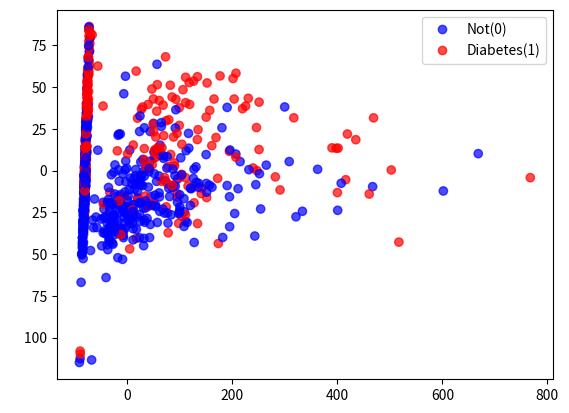

In [11]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_np, cmap='bwr', alpha=0.7)
handles, _ = scatter.legend_elements()
plt.legend(handles, ['Not(0)', 'Diabetes(1)'])
plt.show()

# 그다지 잘 분류되지 않는 것을 확인

# 3. Classification

In [12]:
# 그 전에 일단 n_components 3으로 수정
n_features = 3
pca = PCA(n_components=n_features)
pca.fit(X)
X_pca = pca.transform(X)
print(f'{type(X_pca)} \n{X_pca.shape}')

<class 'numpy.ndarray'> 
(768, 3)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=42)

print(f'X_train.shape {X_train.shape}, y_train.shape {y_train.shape}')
print(f'X_test.shape {X_test.shape}, y_test.shape {y_test.shape}')

X_train.shape (614, 3), y_train.shape (614,)
X_test.shape (154, 3), y_test.shape (154,)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3.1. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train)

0.747557003257329

In [16]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# classification report
y_pred = lr.predict(X_test)
print(f"y_pred.head() \n{y_pred[:5]}")

print()
print(classification_report(y_test, y_pred))

y_pred.head() 
[1 0 1 0 0]

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       100
           1       0.52      0.61      0.56        54

    accuracy                           0.66       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.68      0.66      0.67       154



Confusion Matrix


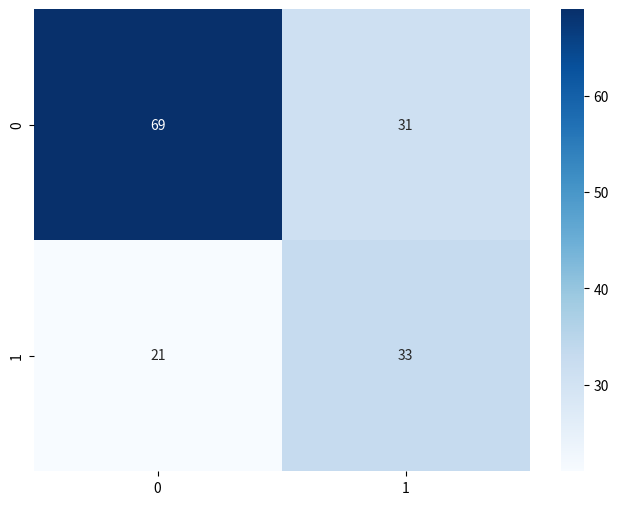

In [17]:
# confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

## 3.2. Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=7, random_state=42)
dt.fit(X_train, y_train)   # non-scaled X로 fitting
dt.score(X_train, y_train) # print 1.0

0.8778501628664495

In [19]:
# Accuracy of the predicted values
y_pred = dt.predict(X_test)
y_test_class = y_test
y_pred_class = y_pred

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       100
           1       0.52      0.46      0.49        54

    accuracy                           0.66       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.65      0.66      0.66       154

[[77 23]
 [29 25]]


## 3.3. Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.8175895765472313

In [21]:
# Accuracy of the predicted values
y_pred = rf.predict(X_test)
y_test_class = y_test
y_pred_class = y_pred

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       100
           1       0.68      0.43      0.52        54

    accuracy                           0.73       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.72      0.73      0.71       154

[[89 11]
 [31 23]]


## 3.4. Dense layer

In [22]:
import tensorflow as tf
from tensorflow import keras

2024-10-06 14:38:29.893609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [24]:
# Create the model
model = keras.models.Sequential()

# Add layers
relu = keras.activations.relu
sigmoid = keras.activations.sigmoid
model.add(keras.layers.Dense(units=32,
                             activation=relu,
                             name='Dense1',
                             input_shape=(n_features,)))
model.add(keras.layers.Dense(units=2,
                             activation=sigmoid,
                             name='Output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 32)                128       
                                                                 
 Output (Dense)              (None, 2)                 66        
                                                                 
Total params: 194
Trainable params: 194
Non-trainable params: 0
_________________________________________________________________


2024-10-06 14:38:32.050191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(X_train_scaled, y_train_onehot,
                    validation_split=0.2,
                    batch_size=None,
                    verbose=2,
                    epochs=20,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
16/16 - 0s - loss: 0.7423 - accuracy: 0.3462 - val_loss: 0.7171 - val_accuracy: 0.3821 - 452ms/epoch - 28ms/step
Epoch 2/20
16/16 - 0s - loss: 0.7139 - accuracy: 0.3910 - val_loss: 0.6903 - val_accuracy: 0.4715 - 52ms/epoch - 3ms/step
Epoch 3/20
16/16 - 0s - loss: 0.6888 - accuracy: 0.5275 - val_loss: 0.6665 - val_accuracy: 0.7480 - 48ms/epoch - 3ms/step
Epoch 4/20
16/16 - 0s - loss: 0.6680 - accuracy: 0.7251 - val_loss: 0.6448 - val_accuracy: 0.8049 - 49ms/epoch - 3ms/step
Epoch 5/20
16/16 - 0s - loss: 0.6484 - accuracy: 0.7413 - val_loss: 0.6229 - val_accuracy: 0.8049 - 48ms/epoch - 3ms/step
Epoch 6/20
16/16 - 0s - loss: 0.6307 - accuracy: 0.7434 - val_loss: 0.6024 - val_accuracy: 0.8049 - 46ms/epoch - 3ms/step
Epoch 7/20
16/16 - 0s - loss: 0.6136 - accuracy: 0.7352 - val_loss: 0.5844 - val_accuracy: 0.8049 - 49ms/epoch - 3ms/step
Epoch 8/20
16/16 - 0s - loss: 0.5994 - accuracy: 0.7373 - val_loss: 0.5660 - val_accuracy: 0.8049 - 47ms/epoch - 3ms/step
Epoch 9/20
16/16 - 0s 

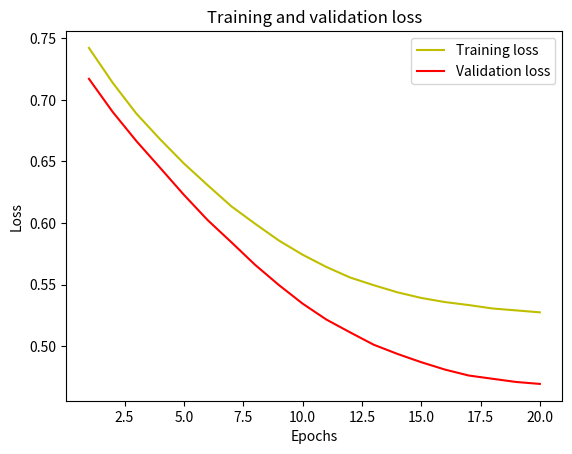

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model(X_test_scaled)
y_pred_probs = sigmoid(y_pred)
y_pred_class = np.argmax(y_pred_probs, axis=1)
y_test_class = np.argmax(y_test_onehot, axis=1)

print(classification_report(y_test_class, y_pred_class,
                            zero_division=0))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.64      0.46      0.54        54

    accuracy                           0.72       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.71      0.72      0.71       154

[[86 14]
 [29 25]]
